In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
import os
sys.path.append('..')

from attack.eval import *
from attack import SamAttacker
from utils import *
from config import *
from segment_anything import sam_model_registry, SamPredictor
from FastSAM.fastsam import FastSAM, FastSAMPrompt

In [2]:
device = 'cuda:7'
samb_model = sam_model_registry["vit_b"](checkpoint=SAM_B_PATH)
samb_model.to(device=device)
samb = SamAttacker(samb_model)

samh_model = sam_model_registry["vit_h"](checkpoint=SAM_H_PATH)
samh_model.to(device=device)
samh = SamAttacker(samh_model)

In [3]:
cossim = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
cos_sim_b_list_TAP = []
cos_sim_h_list_TAP = []
for imgid in range(1, 101):
    imgpath = f'{SAM_DATASET_PATH}sa_{imgid}.jpg'
    samb.set_clean_cv2_image(imgpath)
    clean_features = samb.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    adv_tap_input = samb.TAP(imgpath)
    adv_tap_cv2 = samb.get_cv2_from_torch(adv_tap_input)

    samb.set_image(adv_tap_cv2)
    adv_features = samb.model.image_encoder.hook_feature_list[-1]
    cos_sim_b = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_b_list_TAP.append(cos_sim_b.item())

    samh.set_clean_cv2_image(imgpath)
    clean_features = samh.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    samh.set_image(adv_tap_cv2)
    adv_features = samh.model.image_encoder.hook_feature_list[-1]
    cos_sim_h = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_h_list_TAP.append(cos_sim_h.item())
    print(f'imgid: {imgid}, cos_sim_b: {cos_sim_b.item()}, cos_sim_h: {cos_sim_h.item()}')
    if imgid % 20 == 0:
        # save the results
        np.save(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_b_list_TAP.npy', cos_sim_b_list_TAP)
        np.save(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_h_list_TAP.npy', cos_sim_h_list_TAP)

TAP: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s, loss=-5.62e+3]


imgid: 1, cos_sim_b: 0.8911412954330444, cos_sim_h: 0.9669973850250244


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s, loss=-4.84e+3]


imgid: 2, cos_sim_b: 0.6899834871292114, cos_sim_h: 0.8322298526763916


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s, loss=-5.22e+3]


imgid: 3, cos_sim_b: 0.6137202382087708, cos_sim_h: 0.9073050022125244


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.96it/s, loss=-4.62e+3]


imgid: 4, cos_sim_b: 0.6521718502044678, cos_sim_h: 0.8524357676506042


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s, loss=-3.99e+3]


imgid: 5, cos_sim_b: 0.7109543085098267, cos_sim_h: 0.8177137970924377


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.92it/s, loss=-3.12e+3]


imgid: 6, cos_sim_b: 0.865594744682312, cos_sim_h: 0.9578743577003479


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-3.38e+3]


imgid: 7, cos_sim_b: 0.8744226098060608, cos_sim_h: 0.8993035554885864


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-6.15e+3]


imgid: 8, cos_sim_b: 0.6993298530578613, cos_sim_h: 0.9623475074768066


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.91e+3]


imgid: 9, cos_sim_b: 0.7113182544708252, cos_sim_h: 0.9245345592498779


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.69e+3]


imgid: 10, cos_sim_b: 0.5812976360321045, cos_sim_h: 0.8229970335960388


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.87e+3]


imgid: 11, cos_sim_b: 0.7979327440261841, cos_sim_h: 0.902347207069397


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-5.05e+3]


imgid: 12, cos_sim_b: 0.7939746379852295, cos_sim_h: 0.9230191707611084


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.06e+3]


imgid: 13, cos_sim_b: 0.6231899261474609, cos_sim_h: 0.7149145603179932


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-4.38e+3]


imgid: 14, cos_sim_b: 0.4509400427341461, cos_sim_h: 0.8285622596740723


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=-4.74e+3]


imgid: 15, cos_sim_b: 0.578444242477417, cos_sim_h: 0.8756954669952393


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-5.74e+3]


imgid: 16, cos_sim_b: 0.662406861782074, cos_sim_h: 0.9644217491149902


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-2.03e+3]


imgid: 17, cos_sim_b: 0.9760567545890808, cos_sim_h: 0.9779784083366394


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-3.97e+3]


imgid: 18, cos_sim_b: 0.6136795282363892, cos_sim_h: 0.8336989879608154


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-2.17e+3]


imgid: 19, cos_sim_b: 0.9813655614852905, cos_sim_h: 0.9832408428192139


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-2.22e+3]


imgid: 20, cos_sim_b: 0.9830499887466431, cos_sim_h: 0.9862321615219116


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-4.68e+3]


imgid: 21, cos_sim_b: 0.7400869131088257, cos_sim_h: 0.9358209371566772


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-2.82e+3]


imgid: 22, cos_sim_b: 0.9306269288063049, cos_sim_h: 0.9594471454620361


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-2.39e+3]


imgid: 23, cos_sim_b: 0.9794899225234985, cos_sim_h: 0.9858309626579285


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-4.06e+3]


imgid: 24, cos_sim_b: 0.6570349335670471, cos_sim_h: 0.8547326922416687


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-2.87e+3]


imgid: 25, cos_sim_b: 0.9579013586044312, cos_sim_h: 0.9739596843719482


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.81e+3]


imgid: 26, cos_sim_b: 0.5211941003799438, cos_sim_h: 0.8553435802459717


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-3.46e+3]


imgid: 27, cos_sim_b: 0.9172259569168091, cos_sim_h: 0.9607099294662476


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-2.56e+3]


imgid: 28, cos_sim_b: 0.9712580442428589, cos_sim_h: 0.973945140838623


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-3.99e+3]


imgid: 29, cos_sim_b: 0.7881860733032227, cos_sim_h: 0.8844428062438965


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.92it/s, loss=-3.56e+3]


imgid: 30, cos_sim_b: 0.7766944169998169, cos_sim_h: 0.8716993927955627


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.34e+3]


imgid: 31, cos_sim_b: 0.7369041442871094, cos_sim_h: 0.8836972117424011


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-4.59e+3]


imgid: 32, cos_sim_b: 0.637243390083313, cos_sim_h: 0.8584545850753784


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.56e+3]


imgid: 33, cos_sim_b: 0.6719887256622314, cos_sim_h: 0.8849901556968689


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.72e+3]


imgid: 34, cos_sim_b: 0.6874472498893738, cos_sim_h: 0.8055566549301147


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s, loss=-2.11e+3]


imgid: 35, cos_sim_b: 0.9834139347076416, cos_sim_h: 0.9825223684310913


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.44e+3]


imgid: 36, cos_sim_b: 0.8545795679092407, cos_sim_h: 0.9300084710121155


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-2.2e+3]


imgid: 37, cos_sim_b: 0.9871481657028198, cos_sim_h: 0.9917619228363037


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-5.11e+3]


imgid: 38, cos_sim_b: 0.7112712860107422, cos_sim_h: 0.909386396408081


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-4.15e+3]


imgid: 39, cos_sim_b: 0.8387454748153687, cos_sim_h: 0.8762249946594238


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-4.69e+3]


imgid: 40, cos_sim_b: 0.7364914417266846, cos_sim_h: 0.8799333572387695


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.73e+3]


imgid: 41, cos_sim_b: 0.676831841468811, cos_sim_h: 0.8830264210700989


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-5.24e+3]


imgid: 42, cos_sim_b: 0.8133106827735901, cos_sim_h: 0.9154253005981445


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-5.15e+3]


imgid: 43, cos_sim_b: 0.6829696893692017, cos_sim_h: 0.9377381801605225


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s, loss=-2.28e+3]


imgid: 44, cos_sim_b: 0.9784508943557739, cos_sim_h: 0.9809279441833496


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-3.11e+3]


imgid: 45, cos_sim_b: 0.8640835285186768, cos_sim_h: 0.9327593445777893


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.8e+3]


imgid: 46, cos_sim_b: 0.6669567823410034, cos_sim_h: 0.8520793914794922


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.56e+3]


imgid: 47, cos_sim_b: 0.5243223309516907, cos_sim_h: 0.7120007872581482


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-2.39e+3]


imgid: 48, cos_sim_b: 0.9673724174499512, cos_sim_h: 0.9731833934783936


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-3.08e+3]


imgid: 49, cos_sim_b: 0.8405654430389404, cos_sim_h: 0.9235479831695557


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.92it/s, loss=-3.92e+3]


imgid: 50, cos_sim_b: 0.7118128538131714, cos_sim_h: 0.8285550475120544


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-2.22e+3]


imgid: 51, cos_sim_b: 0.9778068661689758, cos_sim_h: 0.9772595167160034


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-3.3e+3]


imgid: 52, cos_sim_b: 0.8600947856903076, cos_sim_h: 0.906590461730957


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-4.9e+3] 


imgid: 53, cos_sim_b: 0.8102735877037048, cos_sim_h: 0.9558793306350708


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.92it/s, loss=-2.49e+3]


imgid: 54, cos_sim_b: 0.964545488357544, cos_sim_h: 0.9693018198013306


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-4.53e+3]


imgid: 55, cos_sim_b: 0.5990434885025024, cos_sim_h: 0.8528037667274475


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-2.81e+3]


imgid: 56, cos_sim_b: 0.9416460394859314, cos_sim_h: 0.9646955728530884


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-3.88e+3]


imgid: 57, cos_sim_b: 0.774779736995697, cos_sim_h: 0.9176939725875854


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-3.48e+3]


imgid: 58, cos_sim_b: 0.7945526838302612, cos_sim_h: 0.9083341360092163


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.38e+3]


imgid: 59, cos_sim_b: 0.8059188723564148, cos_sim_h: 0.9129177331924438


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.5e+3] 


imgid: 60, cos_sim_b: 0.7716270685195923, cos_sim_h: 0.9168065786361694


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.04e+3]


imgid: 61, cos_sim_b: 0.9782171249389648, cos_sim_h: 0.9728394746780396


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-2.99e+3]


imgid: 62, cos_sim_b: 0.8797908425331116, cos_sim_h: 0.9324949383735657


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-4.35e+3]


imgid: 63, cos_sim_b: 0.7249658703804016, cos_sim_h: 0.8670439720153809


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-2.98e+3]


imgid: 64, cos_sim_b: 0.8962104320526123, cos_sim_h: 0.9414194822311401


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-3.62e+3]


imgid: 65, cos_sim_b: 0.7601257562637329, cos_sim_h: 0.8897777795791626


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-2.51e+3]


imgid: 66, cos_sim_b: 0.981167733669281, cos_sim_h: 0.9848932027816772


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-2.2e+3]


imgid: 67, cos_sim_b: 0.9842790365219116, cos_sim_h: 0.9865709543228149


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-3.9e+3]


imgid: 68, cos_sim_b: 0.7594605684280396, cos_sim_h: 0.8583971261978149


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=-4.66e+3]


imgid: 69, cos_sim_b: 0.7334694266319275, cos_sim_h: 0.8881689310073853


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-4.63e+3]


imgid: 70, cos_sim_b: 0.8235146999359131, cos_sim_h: 0.9188121557235718


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-3.45e+3]


imgid: 71, cos_sim_b: 0.9084498882293701, cos_sim_h: 0.9541512727737427


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.71it/s, loss=-4.9e+3] 


imgid: 72, cos_sim_b: 0.7888801693916321, cos_sim_h: 0.9292525053024292


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=-4.39e+3]


imgid: 73, cos_sim_b: 0.8769296407699585, cos_sim_h: 0.9231973886489868


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-3.9e+3]


imgid: 74, cos_sim_b: 0.9755994081497192, cos_sim_h: 0.9836093187332153


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-2.77e+3]


imgid: 75, cos_sim_b: 0.9363043904304504, cos_sim_h: 0.9499053955078125


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-3.01e+3]


imgid: 76, cos_sim_b: 0.9043927192687988, cos_sim_h: 0.9475533962249756


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.57e+3]


imgid: 77, cos_sim_b: 0.6778638958930969, cos_sim_h: 0.8591957092285156


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.3e+3]


imgid: 78, cos_sim_b: 0.5882353782653809, cos_sim_h: 0.8609473705291748


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-1.35e+3]


imgid: 79, cos_sim_b: 0.9952734708786011, cos_sim_h: 0.9923621416091919


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=-4.64e+3]


imgid: 80, cos_sim_b: 0.6884897947311401, cos_sim_h: 0.9010629057884216


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-3.26e+3]


imgid: 81, cos_sim_b: 0.7755451202392578, cos_sim_h: 0.8984564542770386


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-2.3e+3]


imgid: 82, cos_sim_b: 0.981738805770874, cos_sim_h: 0.9848982691764832


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-3.98e+3]


imgid: 83, cos_sim_b: 0.870739221572876, cos_sim_h: 0.9126845598220825


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-4.28e+3]


imgid: 84, cos_sim_b: 0.7420762777328491, cos_sim_h: 0.8969775438308716


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.29e+3]


imgid: 85, cos_sim_b: 0.6934303641319275, cos_sim_h: 0.9268698692321777


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-3.21e+3]


imgid: 86, cos_sim_b: 0.8703163266181946, cos_sim_h: 0.9158766269683838


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-3.41e+3]


imgid: 87, cos_sim_b: 0.8586997985839844, cos_sim_h: 0.9324247241020203


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=-5.6e+3] 


imgid: 88, cos_sim_b: 0.7949600219726562, cos_sim_h: 0.9569255113601685


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-3.87e+3]


imgid: 89, cos_sim_b: 0.8470486402511597, cos_sim_h: 0.9450475573539734


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.65e+3]


imgid: 90, cos_sim_b: 0.6896427869796753, cos_sim_h: 0.875830888748169


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.38e+3]


imgid: 91, cos_sim_b: 0.7852120399475098, cos_sim_h: 0.8617862462997437


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-4.52e+3]


imgid: 92, cos_sim_b: 0.6976027488708496, cos_sim_h: 0.8911479711532593


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-4.86e+3]


imgid: 93, cos_sim_b: 0.7283158302307129, cos_sim_h: 0.8598692417144775


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-2.25e+3]


imgid: 94, cos_sim_b: 0.9808996915817261, cos_sim_h: 0.9840795993804932


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-3.09e+3]


imgid: 95, cos_sim_b: 0.9249338507652283, cos_sim_h: 0.9455604553222656


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-2.22e+3]


imgid: 96, cos_sim_b: 0.9868980050086975, cos_sim_h: 0.9857621192932129


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.05e+3]


imgid: 97, cos_sim_b: 0.7127199769020081, cos_sim_h: 0.8936553597450256


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-3.54e+3]


imgid: 98, cos_sim_b: 0.7045809030532837, cos_sim_h: 0.8324523568153381


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=-5.75e+3]


imgid: 99, cos_sim_b: 0.6780204772949219, cos_sim_h: 0.9603163003921509


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-5.16e+3]


imgid: 100, cos_sim_b: 0.6657260656356812, cos_sim_h: 0.8624072074890137


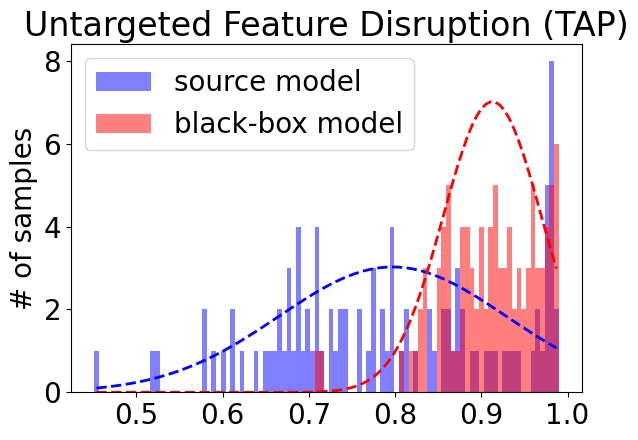

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#list1 = cos_sim_b_list_TAP
#list2 = cos_sim_h_list_TAP
list1 = np.load(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_b_list_TAP.npy')
list2 = np.load(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_h_list_TAP.npy')

data_min = min(min(list1), min(list2))
data_max = max(max(list1), max(list2))

bin_width = (data_max - data_min) / 100

# 计算每个列表的bins边界，确保bins宽度一致
bins_list1 = np.arange(start=data_min, stop=data_max, step=bin_width)
bins_list2 = np.arange(start=data_min, stop=data_max, step=bin_width)


bins1_midpoints = (bins_list1[:-1] + bins_list1[1:]) / 2
bins2_midpoints = (bins_list2[:-1] + bins_list2[1:]) / 2
pdf1 = norm.pdf(bins1_midpoints, np.mean(list1), np.std(list1))
pdf2 = norm.pdf(bins2_midpoints, np.mean(list2), np.std(list2))

# 绘制直方图，alpha值设置透明度为50%
plt.title('Untargeted Feature Disruption (TAP)')
plt.rcParams.update({'font.size': 20})
plt.hist(list1, bins=bins_list1, alpha=0.5, color='blue', label='source model')
plt.hist(list2, bins=bins_list2, alpha=0.5, color='red', label='black-box model')
#plt.xlabel('feature similarity between clean and adversarial images', fontsize=16)
plt.ylabel('# of samples')

plt.plot(bins1_midpoints, pdf1, 'b--', linewidth=2)
plt.plot(bins2_midpoints, pdf2, 'r--', linewidth=2)
plt.legend()
plt.tight_layout()
plt.savefig(f'{PROJECT_PATH}/exp/feature_distance/untarget_sim_hist.pdf')
plt.show()

In [5]:
cossim = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
cos_sim_b_list_AA = []
cos_sim_h_list_AA = []
for imgid in range(1, 101):
    imgpath = f'{SAM_DATASET_PATH}sa_{imgid}.jpg'
    samb.set_clean_cv2_image(imgpath)
    clean_features = samb.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    adv_AA_input = samb.AA(imgpath)
    adv_AA_cv2 = samb.get_cv2_from_torch(adv_AA_input)

    samb.set_image(adv_AA_cv2)
    adv_features = samb.model.image_encoder.hook_feature_list[-1]
    cos_sim_b = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_b_list_AA.append(cos_sim_b.item())

    samh.set_clean_cv2_image(imgpath)
    clean_features = samh.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    samh.set_image(adv_AA_cv2)
    adv_features = samh.model.image_encoder.hook_feature_list[-1]
    cos_sim_h = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_h_list_AA.append(cos_sim_h.item())
    print(f'imgid: {imgid}, cos_sim_b: {cos_sim_b.item()}, cos_sim_h: {cos_sim_h.item()}')
    if imgid % 20 == 0:
        # save the results
        np.save(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_b_list_AA.npy', cos_sim_b_list_AA)
        np.save(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_h_list_AA.npy', cos_sim_h_list_AA)

AA: 100%|██████████| 40/40 [00:07<00:00,  5.22it/s, loss=4.54e+3]


imgid: 1, cos_sim_b: 0.9192703366279602, cos_sim_h: 0.9494110345840454


AA: 100%|██████████| 40/40 [00:07<00:00,  5.19it/s, loss=3.89e+3]


imgid: 2, cos_sim_b: 0.8191139698028564, cos_sim_h: 0.8523067235946655


AA: 100%|██████████| 40/40 [00:07<00:00,  5.16it/s, loss=3.9e+3] 


imgid: 3, cos_sim_b: 0.8117567300796509, cos_sim_h: 0.8505544066429138


AA: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s, loss=3.65e+3]


imgid: 4, cos_sim_b: 0.7805626392364502, cos_sim_h: 0.8138513565063477


AA: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s, loss=3.55e+3]


imgid: 5, cos_sim_b: 0.7940654158592224, cos_sim_h: 0.8319481611251831


AA: 100%|██████████| 40/40 [00:07<00:00,  5.01it/s, loss=3.75e+3]


imgid: 6, cos_sim_b: 0.7236893177032471, cos_sim_h: 0.8006070852279663


AA: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s, loss=4.17e+3]


imgid: 7, cos_sim_b: 0.8903888463973999, cos_sim_h: 0.8847453594207764


AA: 100%|██████████| 40/40 [00:08<00:00,  4.96it/s, loss=4.08e+3]


imgid: 8, cos_sim_b: 0.8501956462860107, cos_sim_h: 0.9255197644233704


AA: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=4.09e+3]


imgid: 9, cos_sim_b: 0.8575308322906494, cos_sim_h: 0.9232064485549927


AA: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=4.06e+3]


imgid: 10, cos_sim_b: 0.7122581601142883, cos_sim_h: 0.7696000337600708


AA: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=4.17e+3]


imgid: 11, cos_sim_b: 0.7914210557937622, cos_sim_h: 0.8580251932144165


AA: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=4.12e+3]


imgid: 12, cos_sim_b: 0.8857198357582092, cos_sim_h: 0.9035866260528564


AA: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=3.68e+3]


imgid: 13, cos_sim_b: 0.7274008989334106, cos_sim_h: 0.729308545589447


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=4.58e+3]


imgid: 14, cos_sim_b: 0.6790341138839722, cos_sim_h: 0.8110156655311584


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.68e+3]


imgid: 15, cos_sim_b: 0.7933722734451294, cos_sim_h: 0.8493784070014954


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=4.32e+3]


imgid: 16, cos_sim_b: 0.84159255027771, cos_sim_h: 0.9140154123306274


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.2e+3] 


imgid: 17, cos_sim_b: 0.8248744606971741, cos_sim_h: 0.8768155574798584


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.43e+3]


imgid: 18, cos_sim_b: 0.827194094657898, cos_sim_h: 0.8662579655647278


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.86e+3]


imgid: 19, cos_sim_b: 0.8071689605712891, cos_sim_h: 0.8328264355659485


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.24e+3]


imgid: 20, cos_sim_b: 0.8633260130882263, cos_sim_h: 0.9184503555297852


AA: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s, loss=0]


imgid: 21, cos_sim_b: 0.9934890866279602, cos_sim_h: 0.9929283857345581


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.07e+3]


imgid: 22, cos_sim_b: 0.8609753847122192, cos_sim_h: 0.9050939083099365


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.78e+3]


imgid: 23, cos_sim_b: 0.7616540193557739, cos_sim_h: 0.8439094424247742


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.64e+3]


imgid: 24, cos_sim_b: 0.7528793811798096, cos_sim_h: 0.8239413499832153


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.08e+3]


imgid: 25, cos_sim_b: 0.9348101615905762, cos_sim_h: 0.9534158110618591


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.66e+3]


imgid: 26, cos_sim_b: 0.8287302851676941, cos_sim_h: 0.9126003980636597


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.38e+3]


imgid: 27, cos_sim_b: 0.8883434534072876, cos_sim_h: 0.9359766244888306


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.67e+3]


imgid: 28, cos_sim_b: 0.7724474668502808, cos_sim_h: 0.8447848558425903


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.41e+3]


imgid: 29, cos_sim_b: 0.8606159687042236, cos_sim_h: 0.8799201250076294


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.97e+3]


imgid: 30, cos_sim_b: 0.8430646061897278, cos_sim_h: 0.8700562715530396


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.38e+3]


imgid: 31, cos_sim_b: 0.8645642399787903, cos_sim_h: 0.9094210863113403


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.83e+3]


imgid: 32, cos_sim_b: 0.7493472099304199, cos_sim_h: 0.7896783351898193


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4e+3]   


imgid: 33, cos_sim_b: 0.7612364292144775, cos_sim_h: 0.8170169591903687


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.02e+3]


imgid: 34, cos_sim_b: 0.7408394813537598, cos_sim_h: 0.782557487487793


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.3e+3] 


imgid: 35, cos_sim_b: 0.7759754657745361, cos_sim_h: 0.8686603307723999


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.71e+3]


imgid: 36, cos_sim_b: 0.9317479729652405, cos_sim_h: 0.9481040239334106


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.98e+3]


imgid: 37, cos_sim_b: 0.8176348805427551, cos_sim_h: 0.8770465850830078


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.05e+3]


imgid: 38, cos_sim_b: 0.8522206544876099, cos_sim_h: 0.8871382474899292


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.59e+3]


imgid: 39, cos_sim_b: 0.8865513801574707, cos_sim_h: 0.8663305640220642


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.82e+3]


imgid: 40, cos_sim_b: 0.7806246280670166, cos_sim_h: 0.7946645021438599


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.45e+3]


imgid: 41, cos_sim_b: 0.8543417453765869, cos_sim_h: 0.903169572353363


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.83e+3]


imgid: 42, cos_sim_b: 0.7080047130584717, cos_sim_h: 0.7779625058174133


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.07e+3]


imgid: 43, cos_sim_b: 0.8819231986999512, cos_sim_h: 0.9197595119476318


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.05e+3]


imgid: 44, cos_sim_b: 0.8348663449287415, cos_sim_h: 0.8776394724845886


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.92e+3]


imgid: 45, cos_sim_b: 0.7159174084663391, cos_sim_h: 0.803430438041687


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.89e+3]


imgid: 46, cos_sim_b: 0.753432035446167, cos_sim_h: 0.813895583152771


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.03e+3]


imgid: 47, cos_sim_b: 0.7824369072914124, cos_sim_h: 0.8291025757789612


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.77e+3]


imgid: 48, cos_sim_b: 0.8513707518577576, cos_sim_h: 0.8852856159210205


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=3.7e+3] 


imgid: 49, cos_sim_b: 0.6824796795845032, cos_sim_h: 0.7329171895980835


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.67e+3]


imgid: 50, cos_sim_b: 0.7886192202568054, cos_sim_h: 0.8167445063591003


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.08e+3]


imgid: 51, cos_sim_b: 0.8453375697135925, cos_sim_h: 0.9180992245674133


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.12e+3]


imgid: 52, cos_sim_b: 0.6892856359481812, cos_sim_h: 0.7064762115478516


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.4e+3] 


imgid: 53, cos_sim_b: 0.8888728618621826, cos_sim_h: 0.9252278804779053


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.09e+3]


imgid: 54, cos_sim_b: 0.7583895921707153, cos_sim_h: 0.80167555809021


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.26e+3]


imgid: 55, cos_sim_b: 0.8269891738891602, cos_sim_h: 0.8830254077911377


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.43e+3]


imgid: 56, cos_sim_b: 0.8387465476989746, cos_sim_h: 0.9058917164802551


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.29e+3]


imgid: 57, cos_sim_b: 0.8246109485626221, cos_sim_h: 0.9042766094207764


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.28e+3]


imgid: 58, cos_sim_b: 0.8693859577178955, cos_sim_h: 0.8828216791152954


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.04e+3]


imgid: 59, cos_sim_b: 0.8577426671981812, cos_sim_h: 0.9055325388908386


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.1e+3] 


imgid: 60, cos_sim_b: 0.8330384492874146, cos_sim_h: 0.8840876817703247


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.71e+3]


imgid: 61, cos_sim_b: 0.8219600915908813, cos_sim_h: 0.8427824378013611


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.91e+3]


imgid: 62, cos_sim_b: 0.7445052266120911, cos_sim_h: 0.8087847232818604


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.89e+3]


imgid: 63, cos_sim_b: 0.7588803768157959, cos_sim_h: 0.8144197463989258


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.86e+3]


imgid: 64, cos_sim_b: 0.7159377932548523, cos_sim_h: 0.7703951597213745


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=3.85e+3]


imgid: 65, cos_sim_b: 0.6882737874984741, cos_sim_h: 0.7817088961601257


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.87e+3]


imgid: 66, cos_sim_b: 0.8677517175674438, cos_sim_h: 0.8975497484207153


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.54e+3]


imgid: 67, cos_sim_b: 0.8821799159049988, cos_sim_h: 0.9197847247123718


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.65e+3]


imgid: 68, cos_sim_b: 0.7455077171325684, cos_sim_h: 0.7482259273529053


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.71e+3]


imgid: 69, cos_sim_b: 0.8472234010696411, cos_sim_h: 0.8894917964935303


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.82e+3]


imgid: 70, cos_sim_b: 0.8671720623970032, cos_sim_h: 0.910209059715271


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.09e+3]


imgid: 71, cos_sim_b: 0.8956749439239502, cos_sim_h: 0.9172921776771545


AA: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s, loss=4.37e+3]


imgid: 72, cos_sim_b: 0.8683104515075684, cos_sim_h: 0.8841589689254761


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.04e+3]


imgid: 73, cos_sim_b: 0.8997863531112671, cos_sim_h: 0.9112809300422668


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.61e+3]


imgid: 74, cos_sim_b: 0.9603918194770813, cos_sim_h: 0.9709023237228394


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.4e+3] 


imgid: 75, cos_sim_b: 0.91395503282547, cos_sim_h: 0.9145866632461548


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.91e+3]


imgid: 76, cos_sim_b: 0.7887373566627502, cos_sim_h: 0.8678864240646362


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.97e+3]


imgid: 77, cos_sim_b: 0.836402416229248, cos_sim_h: 0.8709161281585693


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.38e+3]


imgid: 78, cos_sim_b: 0.756931483745575, cos_sim_h: 0.8639703392982483


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.55e+3]


imgid: 79, cos_sim_b: 0.7984985113143921, cos_sim_h: 0.7903414964675903


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.91e+3]


imgid: 80, cos_sim_b: 0.7552920579910278, cos_sim_h: 0.8381096124649048


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.2e+3] 


imgid: 81, cos_sim_b: 0.669028103351593, cos_sim_h: 0.7519083619117737


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.68e+3]


imgid: 82, cos_sim_b: 0.7889454364776611, cos_sim_h: 0.8346783518791199


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.95e+3]


imgid: 83, cos_sim_b: 0.9353145360946655, cos_sim_h: 0.933190107345581


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.03e+3]


imgid: 84, cos_sim_b: 0.7873589992523193, cos_sim_h: 0.8655664920806885


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.6e+3] 


imgid: 85, cos_sim_b: 0.8328273296356201, cos_sim_h: 0.8882323503494263


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.75e+3]


imgid: 86, cos_sim_b: 0.7626805305480957, cos_sim_h: 0.7979447245597839


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.08e+3]


imgid: 87, cos_sim_b: 0.8692958354949951, cos_sim_h: 0.9117625951766968


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.86e+3]


imgid: 88, cos_sim_b: 0.888366162776947, cos_sim_h: 0.9360278844833374


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.39e+3]


imgid: 89, cos_sim_b: 0.9318296909332275, cos_sim_h: 0.9544558525085449


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.03e+3]


imgid: 90, cos_sim_b: 0.8281400203704834, cos_sim_h: 0.8734599351882935


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.06e+3]


imgid: 91, cos_sim_b: 0.7578467130661011, cos_sim_h: 0.8237581253051758


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.75e+3]


imgid: 92, cos_sim_b: 0.7411877512931824, cos_sim_h: 0.8174484372138977


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.78e+3]


imgid: 93, cos_sim_b: 0.7369309663772583, cos_sim_h: 0.810122013092041


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.97e+3]


imgid: 94, cos_sim_b: 0.875590443611145, cos_sim_h: 0.91484534740448


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.67e+3]


imgid: 95, cos_sim_b: 0.8385821580886841, cos_sim_h: 0.8582137823104858


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.25e+3]


imgid: 96, cos_sim_b: 0.8991389274597168, cos_sim_h: 0.921373188495636


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.71e+3]


imgid: 97, cos_sim_b: 0.7443505525588989, cos_sim_h: 0.8420068621635437


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.36e+3]


imgid: 98, cos_sim_b: 0.6992319226264954, cos_sim_h: 0.7249875664710999


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=4.11e+3]


imgid: 99, cos_sim_b: 0.8062553405761719, cos_sim_h: 0.8905450105667114


AA: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s, loss=3.91e+3]


imgid: 100, cos_sim_b: 0.6978583335876465, cos_sim_h: 0.7731320261955261


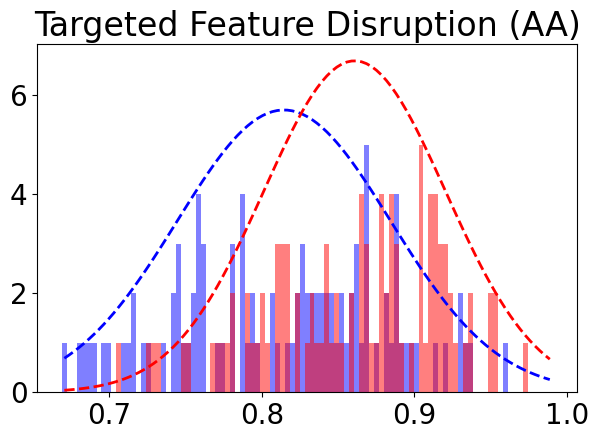

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import norm

list1 = np.load(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_b_list_AA.npy')
list2 = np.load(f'{PROJECT_PATH}/exp/feature_distance/cos_sim_h_list_AA.npy')

data_min = min(min(list1), min(list2))
data_max = max(max(list1), max(list2))

bin_width = (data_max - data_min) / 100

# 计算每个列表的bins边界，确保bins宽度一致
bins_list1 = np.arange(start=data_min, stop=data_max, step=bin_width)
bins_list2 = np.arange(start=data_min, stop=data_max, step=bin_width)


bins1_midpoints = (bins_list1[:-1] + bins_list1[1:]) / 2
bins2_midpoints = (bins_list2[:-1] + bins_list2[1:]) / 2
pdf1 = norm.pdf(bins1_midpoints, np.mean(list1), np.std(list1))
pdf2 = norm.pdf(bins2_midpoints, np.mean(list2), np.std(list2))

# 绘制直方图，alpha值设置透明度为50%
plt.rcParams.update({'font.size': 20})
plt.title('Targeted Feature Disruption (AA)')
plt.hist(list1, bins=bins_list1, alpha=0.5, color='blue', label='source model')
plt.hist(list2, bins=bins_list2, alpha=0.5, color='red', label='black-box model')
#plt.xlabel('feature cosine similarity between clean and adversarial images')
#plt.ylabel('number of samples')

plt.plot(bins1_midpoints, pdf1, 'b--', linewidth=2)
plt.plot(bins2_midpoints, pdf2, 'r--', linewidth=2)
#plt.legend()
plt.tight_layout()
plt.savefig(f'{PROJECT_PATH}/exp/feature_distance/target_sim_hist.png')
plt.show()